In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
# Only consider the top 20k words
max_features  = 20000  
embedding_dim = 128
maxlen = 500

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


25000 Training sequences
25000 Validation sequences


In [3]:
# Model params
max_features = 20000
embedding_dim = 128
sequence_length = 500

inputs = tf.keras.Input(shape=(sequence_length,), 
                        dtype="int64")
x = layers.Embedding(max_features, 
                     embedding_dim)(inputs)

x = layers.Conv1D(128, 7, 
                  padding="valid", 
                  activation="relu", 
                  strides=3)(x)
x = layers.Conv1D(128, 7, 
                  padding="valid", 
                  activation="relu", 
                  strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)

x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 128)          2560000   
                                                                 
 conv1d (Conv1D)             (None, 165, 128)          114816    
                                                                 
 conv1d_1 (Conv1D)           (None, 53, 128)           114816    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                             

2022-12-21 10:03:45.873069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 10:03:45.890524: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 10:03:45.890610: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 10:03:45.890968: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50


2022-12-21 10:03:47.425959: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302


  1/782 [..............................] - ETA: 22:22 - loss: 0.6943 - accuracy: 0.5312

2022-12-21 10:03:48.137381: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


782/782 [==============================] - 10s 10ms/step - loss: 0.4194 - accuracy: 0.7826 - val_loss: 0.3123 - val_accuracy: 0.8656
Epoch 2/50
782/782 [==============================] - 8s 10ms/step - loss: 0.1734 - accuracy: 0.9365 - val_loss: 0.3474 - val_accuracy: 0.8574
Epoch 3/50
782/782 [==============================] - 8s 11ms/step - loss: 0.0515 - accuracy: 0.9832 - val_loss: 0.5559 - val_accuracy: 0.8508
Epoch 4/50
782/782 [==============================] - 8s 10ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.6577 - val_accuracy: 0.8540
Epoch 5/50
782/782 [==============================] - 8s 11ms/step - loss: 0.0180 - accuracy: 0.9940 - val_loss: 0.7214 - val_accuracy: 0.8444
Epoch 6/50
782/782 [==============================] - 9s 11ms/step - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.9131 - val_accuracy: 0.8472
Epoch 7/50
782/782 [==============================] - 8s 11ms/step - loss: 0.0118 - accuracy: 0.9957 - val_loss: 0.9385 - val_accuracy: 0.8414
Epoch 8/5

<Figure size 1000x1000 with 0 Axes>

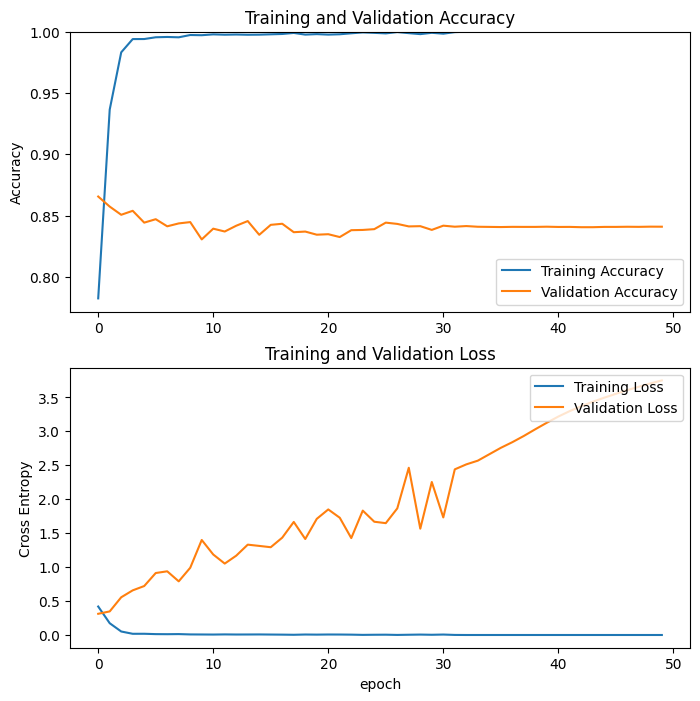

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()